In [ ]:
#This code is used to add the functionality of webscraper for fetching the dataset of fashion trends on instagram.


from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from bs4 import BeautifulSoup
import pandas as pd
import requests
import os
import matplotlib.pyplot as plt
import csv
import io
from PIL import Image


In [ ]:
import os
import wget

In [ ]:
driver = webdriver.Chrome()
driver.get("https://www.instagram.com/")

In [ ]:
username = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR,"input[name='username']")))
password = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR,"input[name='password']")))

username.clear()
password.clear()
#add your usrename and password in the below code
username.send_keys("xxxxxxx")
password.send_keys("xxxxxxx")


In [ ]:
log_in = WebDriverWait(driver,10).until(EC.element_to_be_clickable((By.CSS_SELECTOR,"button[type='submit']"))).click()


In [ ]:
not_now = WebDriverWait(driver,5).until(EC.element_to_be_clickable((By.XPATH,"/html/body/div[2]/div/div/div[2]/div/div/div/div[1]/div[1]/div[2]/section/main/div/div/div/div/div")))


In [ ]:
not_now.click()

In [ ]:
not_now2 = WebDriverWait(driver,5).until(EC.element_to_be_clickable((By.XPATH,"/html/body/div[2]/div/div/div[3]/div/div/div[1]/div/div[2]/div/div/div/div/div[2]/div/div/div[3]/button[2]")))
not_now2.click()

In [ ]:
searchbox = WebDriverWait(driver,10).until(EC.element_to_be_clickable((By.XPATH,"//input[@placeholder='Search']")))
searchbox.clear()
#over here keyword is taken as various trending hashtags like #fashion #influencers #fashioninfluencers
keyword = "#fashion"
searchbox.send_keys(keyword)

In [ ]:
searchbox.send_keys(Keys.ENTER)

In [ ]:
searchbox.send_keys(Keys.ENTER)

In [ ]:
res = WebDriverWait(driver,10).until(EC.element_to_be_clickable((By.XPATH,"/html/body/div[2]/div/div/div[2]/div/div/div/div[1]/div[1]/div[2]/section/div[1]/nav/div/header/div/div/div[1]/div/div/div/div/div/div[3]/div/div/div/div/div/div/a[1]/div[1]/div/div/div[2]/div/div")))


In [ ]:
res.click()

In [ ]:

soup2=BeautifulSoup(driver.page_source, 'lxml')
photos = []
def parse_image_urls(classes, location, source):
    for a in soup2.findAll(attrs={"class": classes}):
        name = a.find(location)
        if name not in photos:
            photos.append(name.get(source))


parse_image_urls("_aagv", "img", "src")



In [ ]:
photos

['https://instagram.fsxr1-1.fna.fbcdn.net/v/t51.2885-15/366949290_864946024999434_3789241705316587634_n.webp?stp=dst-jpg_e35&_nc_ht=instagram.fsxr1-1.fna.fbcdn.net&_nc_cat=106&_nc_ohc=03vGgZ-9ogAAX88jGvb&edm=AGyKU4gBAAAA&ccb=7-5&ig_cache_key=MzE2ODM4OTMwMTQ2ODA4MjI1NQ%3D%3D.2-ccb7-5&oh=00_AfBe7p1_gsA5l3aSSmW5LkW4-nafCUFMbstMqevpxenKmA&oe=64DD230A&_nc_sid=2011ad',
 'https://instagram.fsxr1-1.fna.fbcdn.net/v/t51.2885-15/366615555_761682615732624_2866163252168785394_n.jpg?stp=dst-jpg_e35&_nc_ht=instagram.fsxr1-1.fna.fbcdn.net&_nc_cat=1&_nc_ohc=PFz5CwklrcAAX_iddK8&edm=AGyKU4gBAAAA&ccb=7-5&ig_cache_key=MzE2ODMwOTQ4MDM5MTExNzY5Mw%3D%3D.2-ccb7-5&oh=00_AfA50taB-sGVxKw58hFhWa25NsTyihqxAEd505f8qrS2NA&oe=64DD845B&_nc_sid=2011ad',
 'https://instagram.fsxr1-1.fna.fbcdn.net/v/t51.2885-15/366505739_811867623761902_6991421390171301657_n.webp?stp=dst-jpg_e35&_nc_ht=instagram.fsxr1-1.fna.fbcdn.net&_nc_cat=110&_nc_ohc=6HmH9feqbugAX_GadwB&edm=AGyKU4gBAAAA&ccb=7-5&ig_cache_key=MzE2ODM4OTk4NjYxODMxMDE4MQ%3D

In [ ]:
df = pd.DataFrame({"links": photos})
df.to_csv("links.csv", index=False, encoding="utf-8")

In [ ]:
for c in photos:
# Store the content from the URL to a variable
    image_content = requests.get(c).content

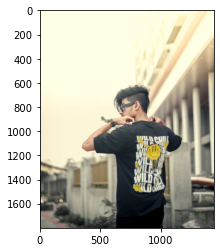

In [ ]:
from pathlib import Path
# hashlib allows us to get hashes. Let's use 'sha1' to name the images.
import hashlib
# Set a file_path variable that points to your directory.
# Create a file based on the sha1 hash of 'image_content'.
# Use .hexdigest to convert it into a string.

for c in photos:
        image_content = requests.get(c).content
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert("RGB")
        plt.imshow(image)
        file_path = Path("/content/drive/flipkart_project/", hashlib.sha1(image_content).hexdigest()[:10] + ".png")
        image.save(file_path, "PNG", quality=80)